In [82]:
#DETECTION OF THE CREDIT CARD FRAUD THROUGH THE SELF ORGANIZING MAPS
#installing the minisom for training
!pip install MiniSom


In [83]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
#IMPORTING THE DATASET
dataset=pd.read_csv('Credit_Card_Applications.csv')

In [85]:
#SPLITTING THE DATASET INTO TWO PARTS
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1]


In [86]:
#feature scaliing
from sklearn.preprocessing  import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x=sc.fit_transform(x)


In [87]:
#Training the self organizing map
from minisom import MiniSom 
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

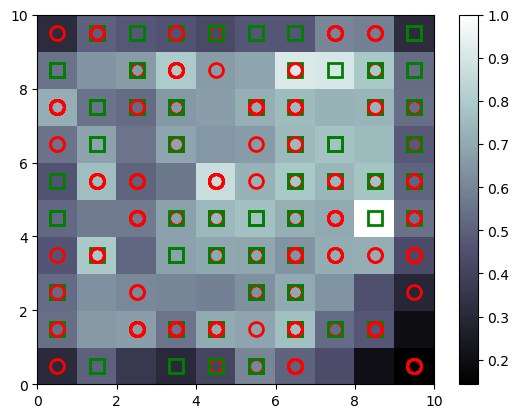

In [88]:
#visualizing the results
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,p in enumerate(x):
    w=som.winner(p)
    plot(w[0]+0.5,
        w[1]+0.5,
         markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()

In [92]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for i in frauds[:, 0]:
  print(int(i))

15739548
15699839
15706762
15783883
15756538
15651868
15728523
15651460
15672637
15794204
15734008
15757434
15769548
15736533
15673907
15737909
15711299
15752578
15611682
15618258
15805261
15608688
15609070
15581871
